In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [26]:
train = pd.read_csv('./datasets/train_clean.csv', index_col=0)
test = pd.read_csv('./datasets/test_clean.csv', index_col=0)

In [27]:
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

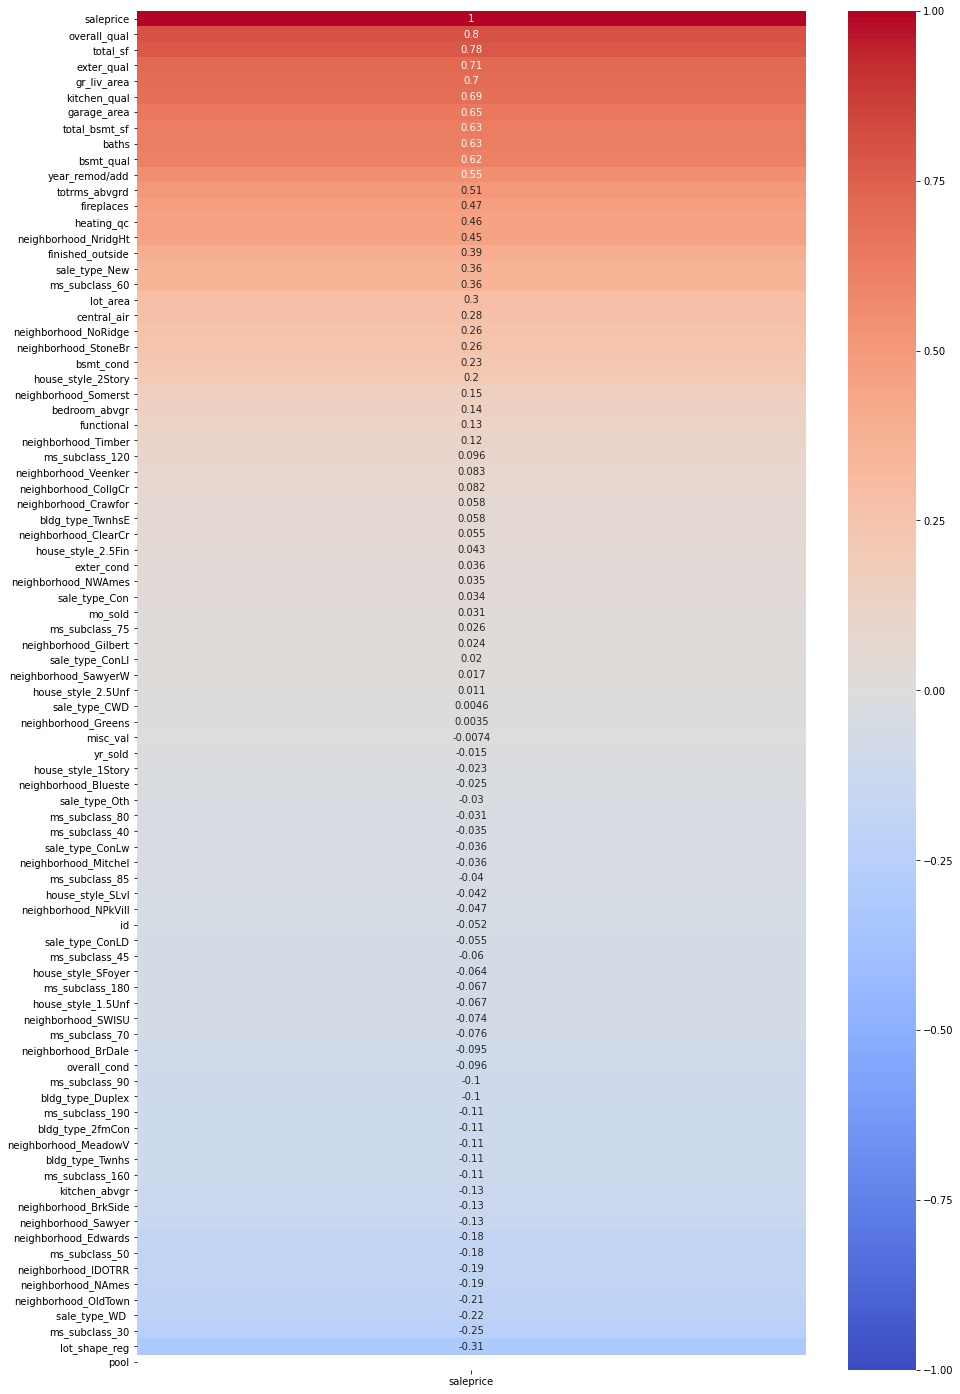

In [103]:
plt.figure(figsize=(15,25))
sns.heatmap(train.corr()[['saleprice']].sort_values('saleprice', ascending=False),
           cmap='coolwarm',
           vmin=-1, vmax=1,
           annot=True)

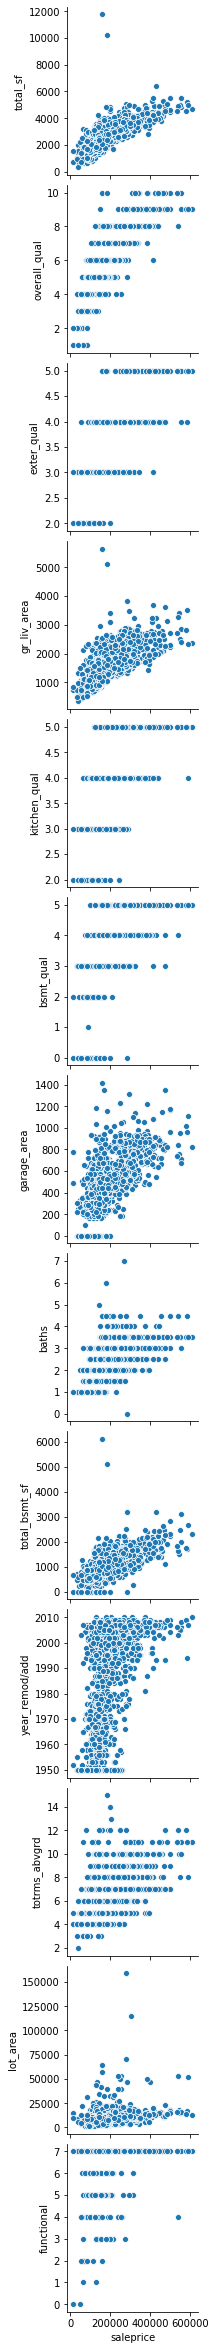

In [42]:
features = ['total_sf', 'overall_qual', 'exter_qual', 'gr_liv_area', 'kitchen_qual',
           'bsmt_qual', 'garage_area', 'baths', 'total_bsmt_sf', 'year_remod/add',
           'totrms_abvgrd', 'lot_area', 'functional']

sns.pairplot(train, y_vars=features, x_vars='saleprice')

In [137]:
#Just a regular linear model.

y = train['saleprice']
X = train[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

lr = LinearRegression()
lr.fit(X_train, y_train)

pred_lr = lr.predict(X_test)
rmse_lr = mean_squared_error(y_test, pred_lr, squared=False)
rmse_lr

31117.10785040973

In [65]:
lr_preds = lr.predict(test[features])
pred_1 = pd.DataFrame()
pred_1['Id'] = test['id']
pred_1['SalePrice'] = lr_preds
pred_1.to_csv('./datasets/subs/lrsub1.csv', index=False)

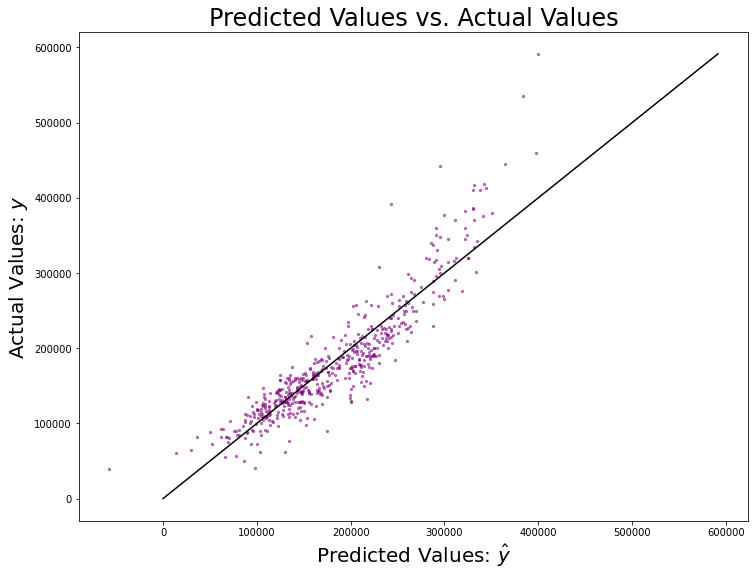

In [138]:
error_scatter(lr.predict(X_test), y_test)

In [66]:
#Tried scaling features, didn't do much.

ss = StandardScaler()
ss.fit(X)
X_scaled = ss.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state = 42)

lr_2 = LinearRegression()
lr_2.fit(X_train, y_train)

pred_lrsc = lr_2.predict(X_test)
rmse_lrsc = mean_squared_error(y_test, pred_lrsc, squared=False)
rmse_lrsc

31117.107850407934

In [67]:
# Taking the natural log of saleprice to build the model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

lr_logy = LinearRegression()
lr_logy.fit(X_train, np.log(y_train))

pred_lr_logy = np.exp(lr_logy.predict(X_test))
rmse_lrogy = mean_squared_error(y_test, pred_lr_logy, squared=False)
rmse_lrogy

25683.570911668994

In [135]:
preds_lr_logy = np.exp(lr_logy.predict(test[features]))
pred_logy = pd.DataFrame()
pred_logy['Id'] = test['id']
pred_logy['SalePrice'] = preds_lr_logy
pred_logy.to_csv('./datasets/subs/lrlogysub2.csv', index=False)

In [69]:
all_feat = test.columns
neighborhoods = all_feat[32:57]
bld_type = all_feat[28:32]
sale_type=all_feat[57:65]
ms_subclass=all_feat[65:79]
house_style=all_feat[79:86]


In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
r_alpha = np.logspace(-3, 3, 100)

ridge_cv = RidgeCV(
    alphas = r_alpha,
    scoring = 'neg_root_mean_squared_error',
    cv=5
)
ridge_cv.fit(X_train, y_train)
ridge_cv.score(X_train, y_train)

0.8075676014185267

In [140]:
preds_ridge = ridge_cv.predict(test[features])
preds_ridge_df = pd.DataFrame()
preds_ridge_df['Id'] = test['id']
preds_ridge_df['SalePrice'] = preds_ridge
preds_ridge_df.to_csv('./datasets/subs/ridgesub2.csv', index=False)

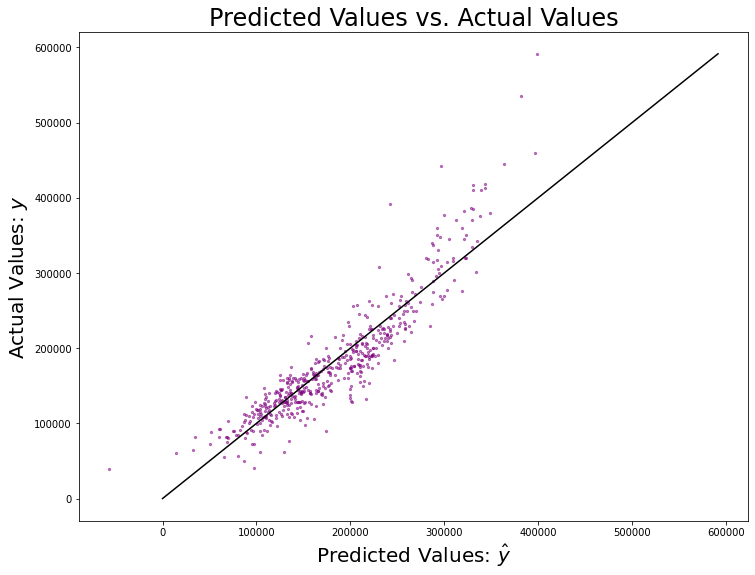

In [142]:
error_scatter(ridge_cv.predict(X_test), y_test)

In [143]:
ridge_cv_logy = RidgeCV(
    alphas = r_alpha,
    scoring = 'neg_root_mean_squared_error',
    cv=5
)
ridge_cv_logy.fit(X_train, np.log(y_train))
mean_squared_error(np.exp(ridge_cv_logy.predict(X_test)),y_test, squared=False)

25454.668661229698

In [144]:
preds_ridge_logy = np.exp(ridge_cv_logy.predict(test[features]))
preds_ridge_logy_df = pd.DataFrame()
preds_ridge_logy_df['Id'] = test['id']
preds_ridge_logy_df['SalePrice'] = preds_ridge_logy
preds_ridge_logy_df.to_csv('./datasets/subs/ridgelogysub3.csv', index=False)

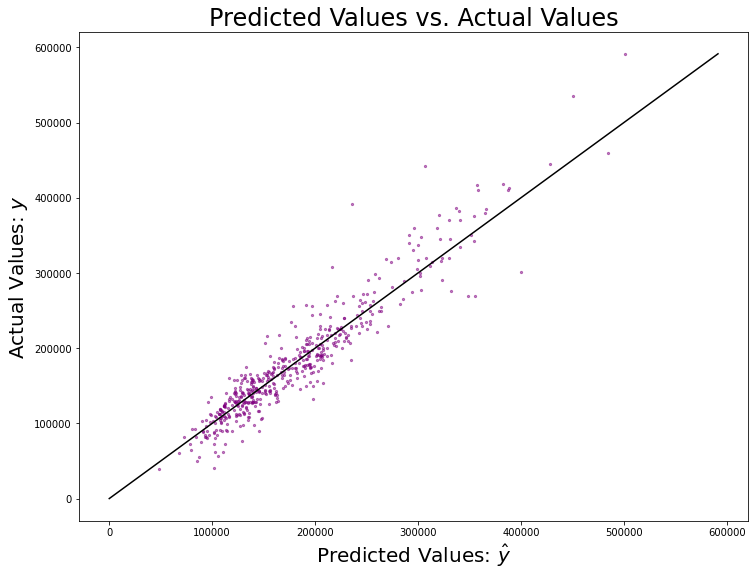

In [145]:
error_scatter(np.exp(ridge_cv_logy.predict(X_test)),y_test)

In [146]:
#neighborhood
features_hood = features + list(neighborhoods)

X_hood = train[features_hood]

X_train, X_test, y_train, y_test = train_test_split(X_hood, y, random_state = 42)

ridge_hood_logy = RidgeCV(
    alphas = r_alpha,
    scoring = 'neg_root_mean_squared_error',
    cv=5
)
ridge_hood_logy.fit(X_train, np.log(y_train))
mean_squared_error(np.exp(ridge_hood_logy.predict(X_test)),y_test, squared=False)


26138.849182417896

In [84]:
preds_ridge_hoodlogy = np.exp(ridge_hood_logy.predict(test[features_hood]))
preds_ridge_hoodlogy_df = pd.DataFrame()
preds_ridge_hoodlogy_df['Id'] = test['id']
preds_ridge_hoodlogy_df['SalePrice'] = preds_ridge_logy
preds_ridge_hoodlogy_df.to_csv('./datasets/subs/ridgehoodlogysub4.csv', index=False)

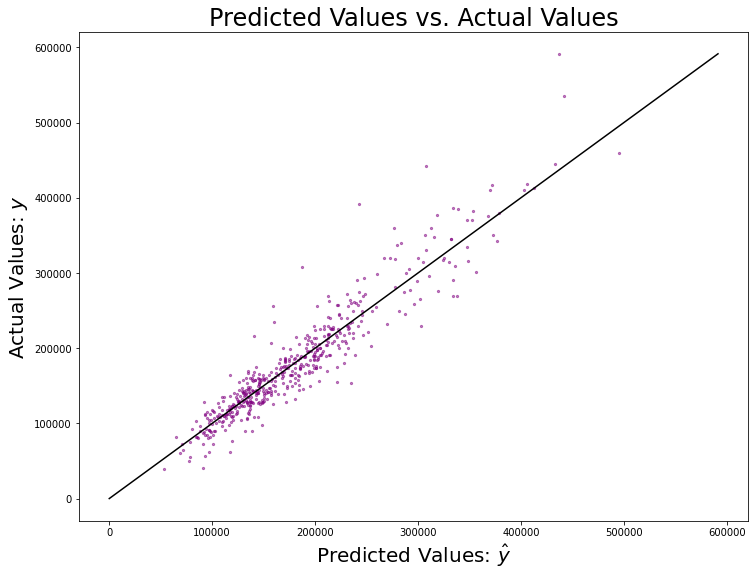

In [147]:
error_scatter(np.exp(ridge_hood_logy.predict(X_test)),y_test)

In [148]:
features_subclass = features + list(ms_subclass)
X_class = train[features_subclass]
X_train, X_test, y_train, y_test = train_test_split(X_class, y, random_state = 42)

ridge_class_logy = RidgeCV(
    alphas = r_alpha,
    scoring = 'neg_root_mean_squared_error',
    cv=5
)
ridge_class_logy.fit(X_train, np.log(y_train))
mean_squared_error(np.exp(ridge_class_logy.predict(X_test)),y_test, squared=False)


25014.935422957107

In [86]:
preds_log_class_ridge = np.exp(ridge_class_logy.predict(test[features_subclass]))
predsdf_log_class_ridge = pd.DataFrame()
predsdf_log_class_ridge['Id'] = test['id']
predsdf_log_class_ridge['SalePrice'] = preds_log_class_ridge
predsdf_log_class_ridge.to_csv('./datasets/subs/ridgeclasslogsub5.csv', index=False)

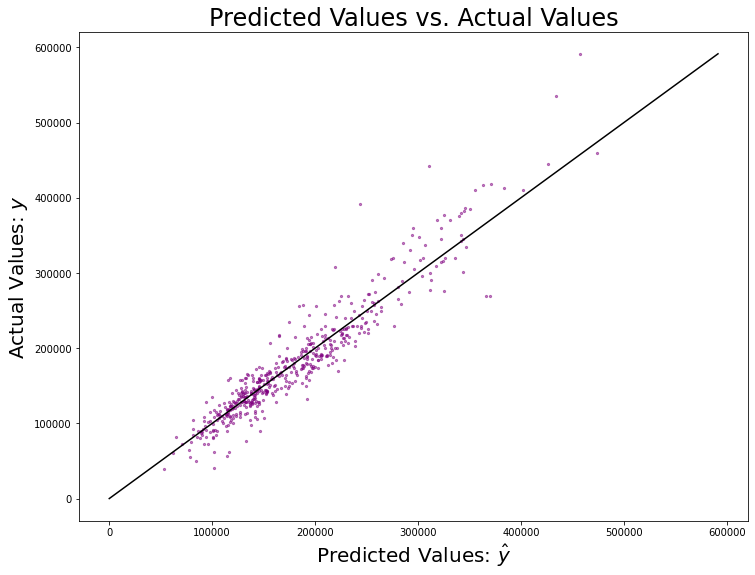

In [153]:
error_scatter(np.exp(ridge_class_logy.predict(X_test)), y_test)

In [154]:
features_style = features + list(house_style)
X_style = train[features_style]
X_train, X_test, y_train, y_test = train_test_split(X_style, y, random_state = 42)

ridge_style_logy = RidgeCV(
    alphas = r_alpha,
    scoring = 'neg_root_mean_squared_error',
    cv=5
)
ridge_style_logy.fit(X_train, np.log(y_train))
mean_squared_error(np.exp(ridge_style_logy.predict(X_test)),y_test, squared=False)


25691.30034654353

In [89]:
preds_log_style_ridge = np.exp(ridge_style_logy.predict(test[features_style]))
predsdf_log_style_ridge = pd.DataFrame()
predsdf_log_style_ridge['Id'] = test['id']
predsdf_log_style_ridge['SalePrice'] = preds_log_style_ridge
predsdf_log_style_ridge.to_csv('./datasets/subs/ridgestylelogsub6.csv', index=False)
                               

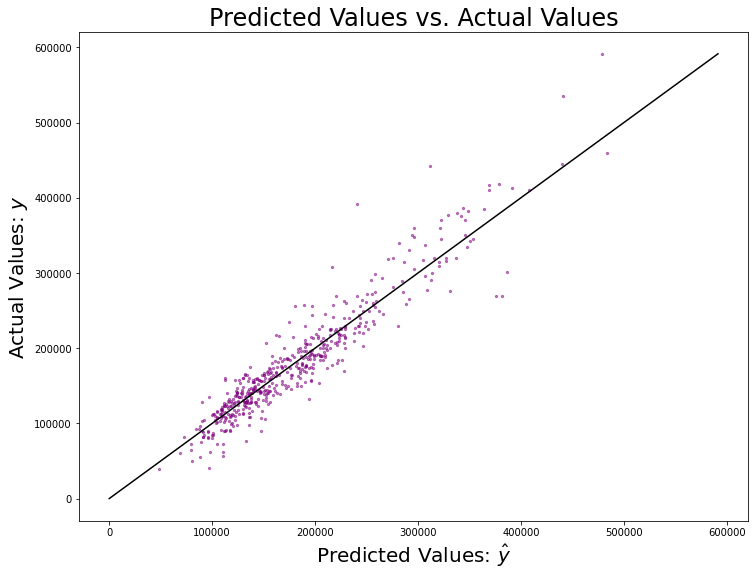

In [155]:
error_scatter(np.exp(ridge_style_logy.predict(X_test)),y_test)

In [156]:
# Hood and Style
features_hoodclass = features_subclass + list(neighborhoods)
X_hs = train[features_hoodclass]
X_train, X_test, y_train, y_test = train_test_split(X_hs, y, random_state = 42)

ridge_hc_logy = RidgeCV(
    alphas = r_alpha,
    scoring = 'neg_root_mean_squared_error',
    cv=5
)
ridge_hc_logy.fit(X_train, np.log(y_train))
mean_squared_error(np.exp(ridge_hc_logy.predict(X_test)),y_test, squared=False)


24692.780537278773

In [91]:
preds_hc = np.exp(ridge_hc_logy.predict(test[features_hoodclass]))
predsdf_hc = pd.DataFrame()
predsdf_hc['Id'] = test['id']
predsdf_hc['SalePrice'] = preds_hc
predsdf_hc.to_csv('./datasets/subs/hoodclasssub7.csv', index=False)
                               

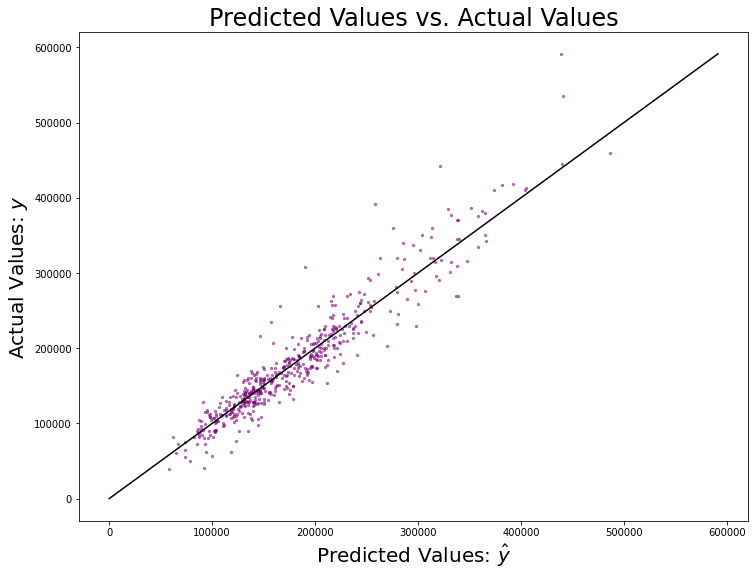

In [157]:
error_scatter(np.exp(ridge_hc_logy.predict(X_test)),y_test)

In [158]:
#everything
features_all = train.drop(columns=['id','saleprice']).columns
X_all = train[features_all]

X_train, X_test, y_train, y_test = train_test_split(X_all, y, random_state = 42)

ridge_all = RidgeCV(
    alphas = r_alpha,
    scoring = 'neg_root_mean_squared_error',
    cv=5
)
ridge_all.fit(X_train, np.log(y_train))
mean_squared_error(np.exp(ridge_all.predict(X_test)),y_test, squared=False)


23675.374480295905

In [ ]:
# preds_all = np.exp(ridge_all.predict(test[features_all]))
predsdf_all = pd.DataFrame()
predsdf_all['Id'] = test['id']
predsdf_all['SalePrice'] = preds_all
predsdf_all.to_csv('./datasets/subs/allin8.csv', index=False)
                               

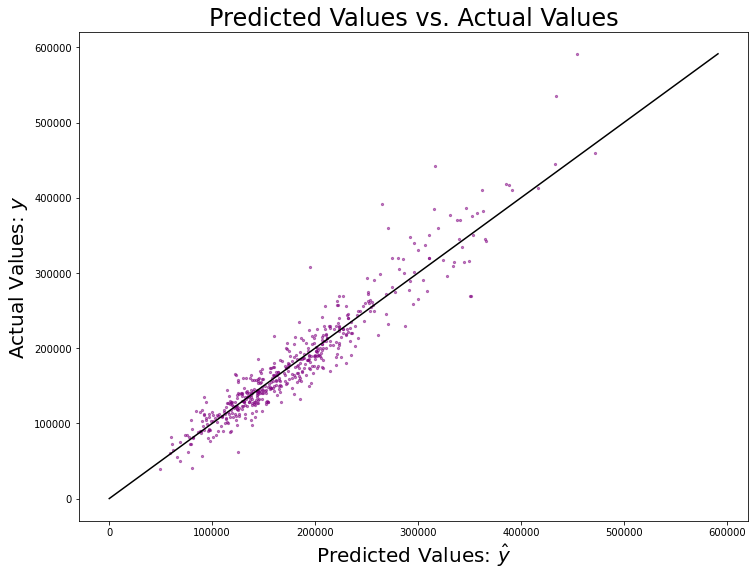

In [159]:
error_scatter(np.exp(ridge_all.predict(X_test)),y_test)

In [130]:
ridge_all.coef_

array([ 1.23874867e-06,  7.03854785e-02,  3.46807889e-02,  2.59581879e-04,
        1.65538159e-02,  1.69481811e-02,  4.42730192e-02, -1.34649070e-02,
       -7.54038652e-05,  2.11882051e-02,  9.24839250e-02,  1.46508713e-04,
        5.88933483e-03, -4.91706207e-02,  3.82344768e-02,  2.36464457e-03,
        3.50824139e-02,  3.95816959e-02,  1.27782061e-04, -4.05735434e-05,
        7.11048089e-05,  9.39726659e-05, -1.29958210e-02,  6.94005285e-02,
        0.00000000e+00,  1.29223574e-03, -1.83046679e-03,  2.63433931e-02,
       -1.08683410e-02, -7.38476867e-02, -2.95875979e-02, -1.99014010e-02,
       -3.43518577e-02, -2.73977541e-02,  7.08743623e-02,  9.17990145e-03,
        8.50128963e-02, -9.53365332e-02, -5.99266493e-03,  1.77841616e-03,
       -1.29286984e-01, -8.65119752e-02,  1.19643702e-02, -6.42357654e-03,
       -1.69212213e-02, -3.55191276e-02,  5.31692804e-02,  1.24447987e-01,
       -1.15774435e-01, -5.60312699e-02, -9.56244101e-03, -1.90027102e-02,
        6.09010085e-02,  

In [160]:
# Lassoo

lasso_all = LassoCV(
    alphas=r_alpha,
    cv=5)
lasso_all.fit(X_train, np.log(y_train))
mean_squared_error(np.exp(lasso_all.predict(X_test)),y_test, squared=False)


/Users/jsf/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03616696369914507, tolerance: 0.021390876903632772
  tol, rng, random, positive)
/Users/jsf/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.1881472667231137, tolerance: 0.021390876903632772
  tol, rng, random, positive)
/Users/jsf/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.1252346571038814, tolerance: 0.021390876903632772
  tol, rng, random, positive)
/Users/jsf/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: Con

/Users/jsf/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.863444076008321, tolerance: 0.020790848629879732
  tol, rng, random, positive)
/Users/jsf/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.7885609436965453, tolerance: 0.020790848629879732
  tol, rng, random, positive)
/Users/jsf/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.710381930255142, tolerance: 0.020790848629879732
  tol, rng, random, positive)
/Users/jsf/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: Conver

24154.381917337458

In [102]:
preds_lass = np.exp(lasso_all.predict(test[features_all]))
predsdf_lass = pd.DataFrame()
predsdf_lass['Id'] = test['id']
predsdf_lass['SalePrice'] = preds_lass
predsdf_lass.to_csv('./datasets/subs/lassoall.csv', index=False)

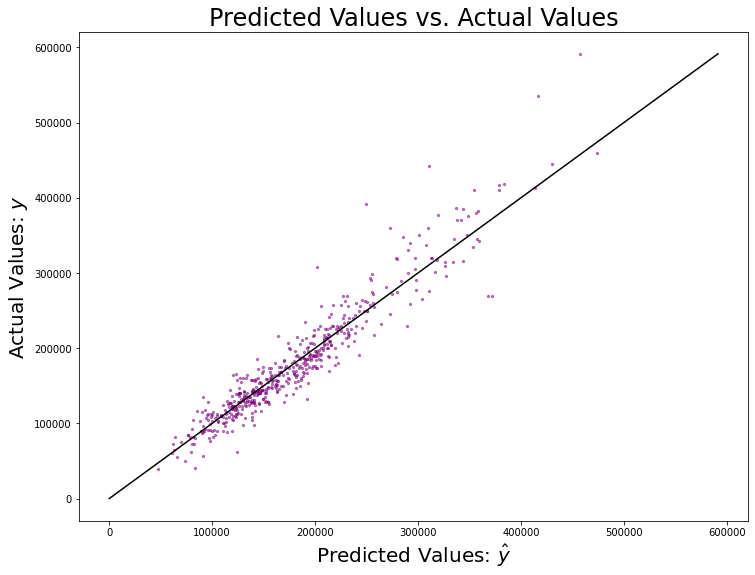

In [161]:
error_scatter(np.exp(lasso_all.predict(X_test)),y_test)

In [162]:
features_simple = ['overall_qual', 'total_sf', 'lot_area']
X_s = train[features_simple]
X_train, X_test, y_train, y_test = train_test_split(X_s, y, random_state = 42)

lasso_sl = LassoCV(
    alphas=r_alpha,
    cv=5)
lasso_sl.fit(X_train, np.log(y_train))
print(f'logy: {mean_squared_error(np.exp(lasso_sl.predict(X_test)),y_test, squared=False)}')

lasso_s = LassoCV(
    alphas=r_alpha,
    cv=5)
lasso_s.fit(X_train, (y_train))
print(f'y: {mean_squared_error((lasso_s.predict(X_test)),y_test, squared=False)}')


logy: 28714.281845166628
y: 34260.56552034745


In [131]:
lasso_sl.coef_

array([1.66280083e-01, 1.74885784e-04, 5.24813794e-06, 0.00000000e+00])

In [163]:
features_ = features + list(sale_type)
X_ = train[features_]

# sx = StandardScaler()
# sx.fit(X_)
# X_s = sx.transform(X_)

X_train, X_test, y_train, y_test = train_test_split(X_, y, random_state = 42)

lasso_ss = LassoCV(
    alphas=r_alpha,
    cv=5)
lasso_ss.fit(X_train, np.log(y_train))
print(f'logy: {mean_squared_error(np.exp(lasso_ss.predict(X_test)),y_test, squared=False)}')

lasso_sss = LassoCV(
    alphas=r_alpha,
    cv=5)
lasso_sss.fit(X_train, (y_train))
print(f'y: {mean_squared_error((lasso_sss.predict(X_test)),y_test, squared=False)}')


logy: 25710.646852588496
y: 30841.696996773415


/Users/jsf/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.859051215235485, tolerance: 0.026120440623101242
  positive)
/Users/jsf/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 355632095681.2156, tolerance: 820221481.6350647
  tol, rng, random, positive)
/Users/jsf/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 350616117285.4403, tolerance: 820221481.6350647
  tol, rng, random, positive)
/Users/jsf/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective d

In [123]:
preds_lasss = np.exp(lasso_ss.predict(test[features_]))
predsdf_lasss = pd.DataFrame()
predsdf_lasss['Id'] = test['id']
predsdf_lasss['SalePrice'] = preds_lasss
predsdf_lasss.to_csv('./datasets/subs/lasssosaletype.csv', index=False)

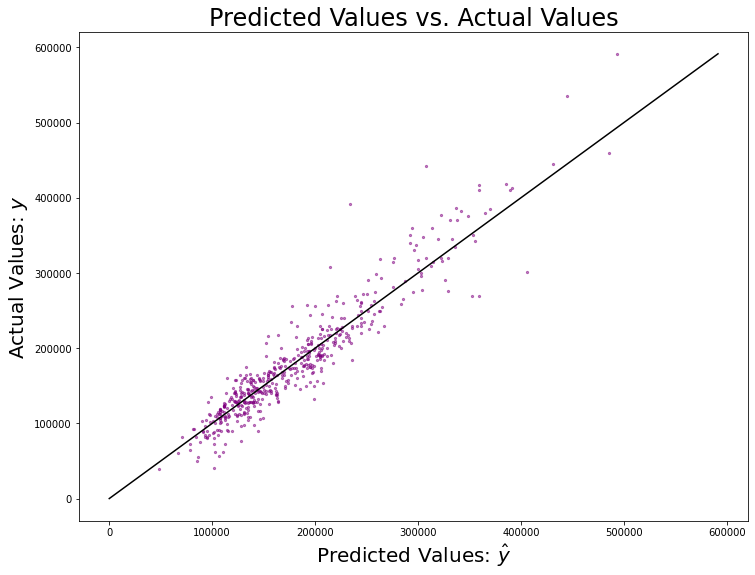

In [164]:
error_scatter(np.exp(lasso_ss.predict(X_test)),y_test)

In [133]:
# features_simple = ['overall_qual', 'total_sf', 'lot_area']
X_s = train[features_simple]
X_train, X_test, y_train, y_test = train_test_split(X_s, y, random_state = 42)
l_alpha = np.logspace(-6, 6, 150)

lasso_sl1 = LassoCV(
    alphas=l_alpha,
    cv=5)
lasso_sl1.fit(X_train, np.log(y_train))
print(f'logy: {mean_squared_error(np.exp(lasso_sl1.predict(X_test)),y_test, squared=False)}')
print(lasso_sl1.coef_)
lasso_s1 = LassoCV(
    alphas=r_alpha,
    cv=5)
lasso_s1.fit(X_train, (y_train))
print(f'y: {mean_squared_error((lasso_s1.predict(X_test)),y_test, squared=False)}')
print(lasso_s1.coef_)

logy: 28712.157912532824
[1.68199968e-01 1.72480597e-04 5.31699207e-06]
y: 34260.56552034745
[2.98954146e+04 3.69748444e+01 1.06783134e+00]


In [134]:
X_all = train[features_all]

X_train, X_test, y_train, y_test = train_test_split(X_all, y, random_state = 42)

ridge_all = RidgeCV(
    alphas = l_alpha,
    scoring = 'neg_root_mean_squared_error',
    cv=5
)
ridge_all.fit(X_train, np.log(y_train))
mean_squared_error(np.exp(ridge_all.predict(X_test)),y_test, squared=False)


/Users/jsf/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.3229e-17): result may not be accurate.
  overwrite_a=True).T
/Users/jsf/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.40611e-17): result may not be accurate.
  overwrite_a=True).T
/Users/jsf/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.55646e-17): result may not be accurate.
  overwrite_a=True).T
/Users/jsf/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.4485e-17): result may not be accurate.
  overwrite_a=True).T
/Users/jsf/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.56918e-17): result may not be accurate.
  overwrite_a=True).T
/Users/jsf/o

/Users/jsf/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.94278e-17): result may not be accurate.
  overwrite_a=True).T
/Users/jsf/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.00905e-16): result may not be accurate.
  overwrite_a=True).T
/Users/jsf/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.11008e-16): result may not be accurate.
  overwrite_a=True).T


23672.012531941516

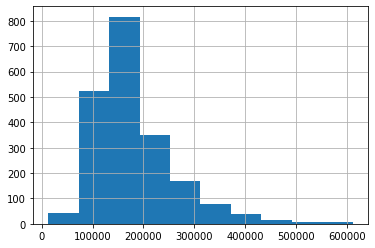

In [128]:
train['saleprice'].hist()

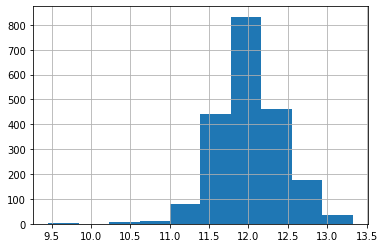

In [129]:
np.log(train['saleprice']).hist()

In [136]:
# Make quick scatters of train/test ys.  also have y=x line

def error_scatter(y_preds, y):
    # Plot the model
    plt.figure(figsize=(12,9))

    # Generate a scatterplot of predicted values versus actual values.
    plt.scatter(y_preds, y, s=5, color='purple', alpha = 0.5)

    # Plot a line. Everything above is predicted low
    plt.plot([0, np.max(y)],
             [0, np.max(y)],
             color = 'black')

    # Tweak title and axis labels.
    plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
    plt.ylabel("Actual Values: $y$", fontsize = 20)
    plt.title('Predicted Values vs. Actual Values', fontsize = 24);